# Yelp Data Challenge - NLP


Sep 2018

## data description
### business info
#### *business_id, *categories, *city, *name, *review_count,  *avg_stars

### customer info
#### *review_id,  *user_id, *cool, *funny, *useful, *stars, text

## Import data

In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [8]:
df = pd.read_csv('clean_busi_rev_joint.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488769 entries, 0 to 488768
Data columns (total 14 columns):
business_id     488769 non-null object
categories      488769 non-null object
city            488769 non-null object
name            488769 non-null object
review_count    488769 non-null int64
avg_stars       488769 non-null float64
cool            488769 non-null int64
date            488769 non-null object
funny           488769 non-null int64
review_id       488769 non-null object
stars           488769 non-null int64
text            488769 non-null object
useful          488769 non-null int64
user_id         488769 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 52.2+ MB


In [10]:
df.head(5)

,business_id,categories,city,name,review_count,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g


In [15]:
df.describe()

,review_count,avg_stars,cool,funny,stars,useful
count,488769.000000,488769.000000,488769.000000,488769.000000,488769.000000,488769.000000
mean,909.766953,3.845618,0.582279,0.416190,3.836203,0.929895
std,1283.889899,0.597600,2.951839,2.198931,1.429897,3.440483
min,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,209.000000,3.500000,0.000000,0.000000,3.000000,0.000000
50%,459.000000,4.000000,0.000000,0.000000,4.000000,0.000000
75%,1024.000000,4.500000,0.000000,0.000000,5.000000,1.000000
max,7968.000000,5.000000,227.000000,202.000000,5.000000,236.000000


In [14]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
print(documents.isnull().sum(),len(documents))


0 488769


## Exploratory data analysis(EDA)

#### * text length is one measure of customer's satisfaction

In [32]:
df['text length']=df['text'].apply(len)

In [45]:
df.head(10)

,business_id,categories,city,name,review_count,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,text length
0,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA,252
1,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og,86
2,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g,2212
3,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw,860
4,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g,312
5,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-05-20,0,Pnkrj90xfykhHyo4BSFRsw,5,ABSOLUTE MUST IN VEGAS! Loved everything my bo...,0,cZVQGCZ_fHtTdfiyGVJPdg,124
6,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-06-13,0,sRXpmPl7q9JFXehiJuBUlA,5,The most amazing French onion soup I've ever h...,0,rhP3yu4Sxpj9OXgeY0VpLg,243
7,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-12-30,0,Oeh7e6U2xaDQI9L9i4x_Gw,2,I had high hopes for Delmonico's Steakhouse in...,0,li2cBZl60vgqihDJJG7jeA,741
8,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-10-08,0,A4n462mLrximfNPPebCSsw,4,A first class steak house and pricey. Everythi...,0,zGipc5uOJrejX6KkUsSNpA,530
9,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,152


Text(0,0.5,'counts')

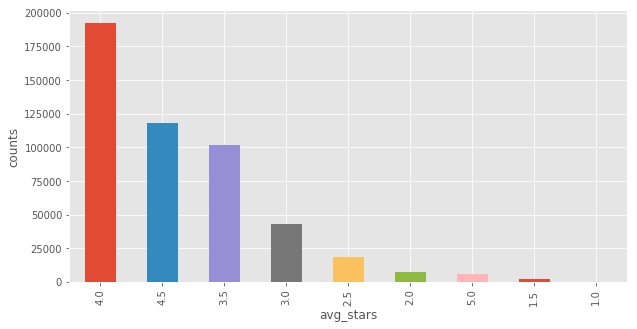

In [51]:
h=df['avg_stars'].value_counts().plot(kind='bar', align='center',width=0.5,figsize=(10,5))
plt.xlabel('avg_stars', fontdict=None, labelpad=None)
plt.ylabel('counts', fontdict=None, labelpad=None)

Text(0.5,0,'text length')

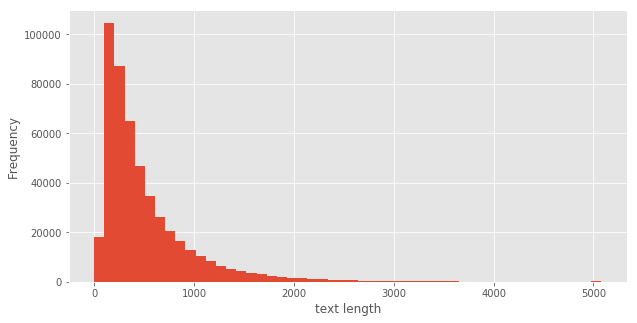

In [59]:
df['text length'].plot.hist(bins=50,label='text length',figsize=(10,5))
plt.xlabel('text length', fontdict=None, labelpad=None)

In [60]:
df['text length'].describe()

count    488769.000000
mean        515.782525
std         492.901409
min           1.000000
25%         204.000000
50%         356.000000
75%         647.000000
max        5080.000000
Name: text length, dtype: float64

In [72]:
print(df.loc[df['text length']==5080]['stars'].values, df.loc[df['text length']==5080]['text'].values,)

[3] ['"Just let me go we\'ll meet again soon\r\n"Now wait, wait, wait for me\r\n"Please hang around\r\n"I\'ll see you when I fall asleep"\r\n\r\n-------------------------------------\r\n\r\nIn A Sentence\x99\r\nA faux-Mexican chain conveniently located in the far-North neighbourhood of Centennial. (Winter is Coming®.)\r\n\r\nQuick Review\x99\r\n+ Chicken, pork*, steak, soy, vegetarian burritos/bowls, et cetera. They run through their queues fast as hell now (post-2015 scandal). (*Overheard today: "is carnitas pork?" Heh.) \r\n\r\n- Nickel and diming: 2$ upcharge for guacamole? Bruv, an USDA-certified organic avocado is a buck at Smith\'s across the lot. \r\n\r\nEmployee of Excellence\x99\r\n+ The cashier/till employee\'s right-hand woman, typically the conduit between the Ford assembly line and the cashier, who noticed tonight that I had left my fancy phone on the wooding that frames the till area after having placed it there to get my free burrito offer scanned. \r\n\r\n--------------

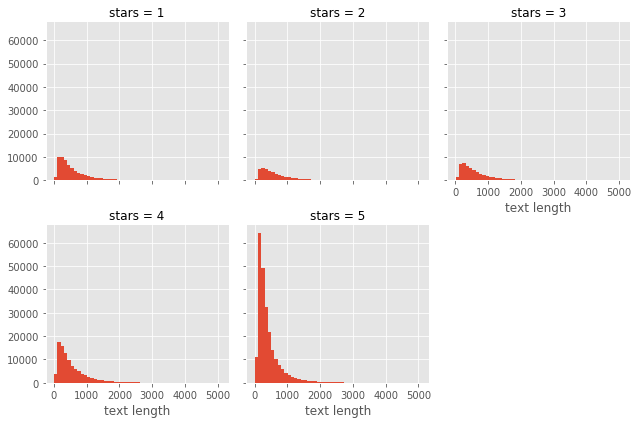

In [70]:
# text length hist plot
g = sns.FacetGrid(data=df, col='stars',col_wrap=3)
g.map(plt.hist, 'text length', bins=50)

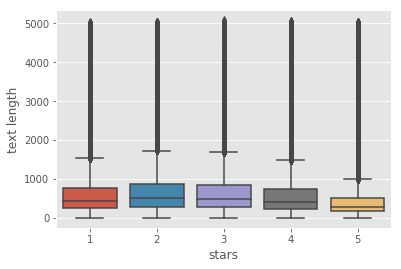

In [140]:
sns.boxplot(x='stars', y='text length', data=df)
plt.savefig('Fig_boxplot_stars.pdf')

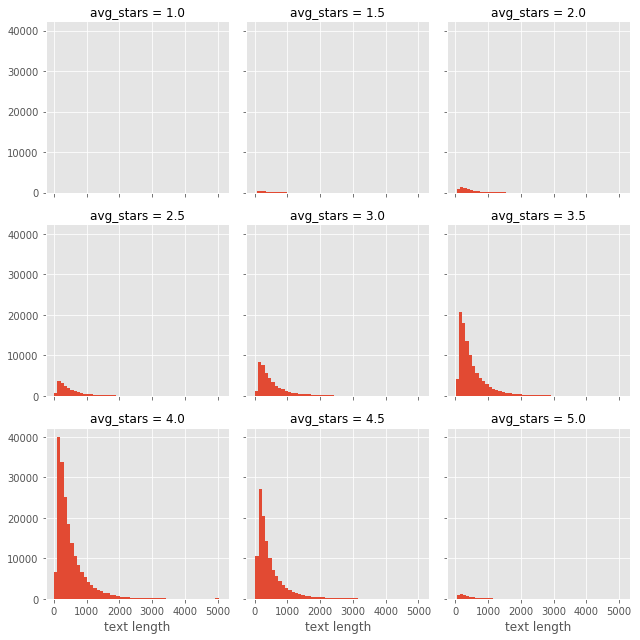

In [141]:
g = sns.FacetGrid(data=df, col='avg_stars',col_wrap=3)
g.map(plt.hist, 'text length', bins=50)
plt.savefig('Fig_hist_avg_tars.pdf')

#### *rating is a direct meaure of customer's satisfaction, I am interested in high rating (4.5 stars and above) and imperfect (1-4.5 stars) rating

In [78]:
# Make a column and take the values, save to a variable named "target"
df['target']=[1 if element >= 4.5 else 0 for element in df['stars']]
target=df['target']

#### *Check statistic of the target variable

In [84]:
# To be implemented
df['target'].describe()

count    488769.000000
mean          0.486510
std           0.499818
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

In [92]:
# Take a look at the review
documents=df['text'].values
print(documents[10],documents.shape)

10/27/2016-I had my birthday dinner here and it was worth the splurge.  I have to say something about the décor - it was too plain and sterile and I expected a little more character from this establishment.  I would have added some wood paneling or some framed mirrors.  But the food was worth it.  We ordered the New Orleans BBQ Shrimp, Butternut Squash Ravioli, Traditional New Orleans Gumbo, and of course the 16 oz Rib Eye steak.  Our side dishes included the Country Smashed Potato, Delmonico Creamed Spinach, Buttered Fresh Asparagus, and Sauteed Garlic Mushrooms.  All the dishes we ordered were delicious.  Our steak was medium rare and it was sooo good.  The meat was tender with the right amount of fatty goodness.  My favorite sides were the asparagus (cooked just right, not over or under cooked) and the mushrooms.  The creamed spinach was a little too salty for me.  They added a nice touch to my birthday by serving complimentary appetizer and dessert (mango sorbet) (488769,)


## Create training dataset and test dataset

In [76]:
from sklearn.cross_validation import train_test_split

C:\Users\jenny\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [94]:
# Documents is your X, target is your y
# Now split the data to training set and test set
documents_train, documents_test, target_train, target_test = train_test_split(documents, target, test_size=0.3, random_state=0)

In [95]:
documents_train.shape


(342138,)

## NLP representation of the documents

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
type(vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [96]:
# Train the model with the training data
X_train = vectorizer.fit_transform(documents_train).toarray()
words = vectorizer.get_feature_names()

In [85]:
words[0:110]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '20',
 '2016',
 '2017',
 '21',
 '22',
 '24',
 '25',
 '2nd',
 '30',
 '30pm',
 '35',
 '3rd',
 '40',
 '45',
 '50',
 '60',
 '75',
 '80',
 '90',
 '95',
 '99',
 'able',
 'absolute',
 'absolutely',
 'accommodate',
 'accommodating',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'admit',
 'adults',
 'advance',
 'affordable',
 'afternoon',
 'aged',
 'ago',
 'agree',
 'agreed',
 'ahead',
 'ahi',
 'aioli',
 'air',
 'airport',
 'al',
 'alcohol',
 'alfredo',
 'allow',
 'allowed',
 'almond',
 'alright',
 'amazing',
 'amazingly',
 'ambiance',
 'ambience',
 'american',
 'anniversary',
 'annoyed',
 'annoying',
 'answer',
 'answered',
 'anymore',
 'anytime',
 'anyways',
 'apart',
 'apologize',
 'apologized',
 'apology',
 'app',
 'apparently',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'appreciate',
 'appreciated',
 'apps',
 'area',
 'aren',
 'aria',
 'arrive',
 'arri

In [87]:
# Use the trained model to transform your test data
y_test = target_test
X_test = vectorizer.transform(documents_test)

In [97]:
# Get the vocab of the tfidf
print(X_train.shape,X_test.shape)

(342138, 2000) (146631, 2000)


## Similar review search engine

In [98]:
import numpy as np

# Build functions to return the top search values 

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order


### Top frequent 20 words in the training review set

In [25]:
avg = np.sum(vectors, axis=0) 
print("top 20 by average tf-idf")
print(get_top_values(avg, 20, words))


top 20 by average tf-idf
['food', 'great', 'good', 'place', 'service', 'time', 'just', 'like', 'best', 'vegas', 'amazing', 'really', 'delicious', 'chicken', 'love', 'ordered', 'restaurant', 'definitely', 'order', 'got']


## Build a search engine to find similar reviews

In [103]:
# Use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [99]:
# Draw an arbitrary review from test (unseen in training) documents
some_random_number = 42
search_query = documents_test[some_random_number]
search_query = [search_query] # Need to be put into a list-like format
print(search_query)

["I never even went here (went to a neighboring biz) but somehow they found my email address and solicited a review from me. And then didn't reply to my message when I contacted them about it. Well, here's your review! That is just creepy, stalking behavior from your business and completely uncalled for. I still want to know how you got my location data and email address."]


In [101]:
# Transform the drawn review(s) to vector(s)
search_query_vectorized = vectorizer.transform(search_query).toarray() # search_query needs to be a list format! [search_query]
print(search_query_vectorized,search_query_vectorized.shape)

[[0. 0. 0. ... 0. 0. 0.]] (1, 2000)


In [104]:
simi_score_search=cosine_similarity(search_query_vectorized,X_train)

In [110]:
len(simi_score_search[0])

342138

In [111]:
#find the top 5 silimar reviews
n_rev=5
returned_reviews=get_top_values(simi_score_search[0],n_rev,documents_train.tolist())

In [135]:
returned_rating=[df.loc[df['text']==returned_reviews[i]]['stars'].values[0] for i in range(n_rev)]

In [136]:
returned_review_rating=[[returned_rating[i],returned_reviews[i]] for i in range(n_rev)]

In [137]:
print(returned_review_rating)

[[5, "Left a mediocre review awhile back & finally got around to going again. To be honest I was nervous because I was contacted by Omar, the manager because of my review (he was very polite & wanted to prevent the situation from happening again) so it shows that they care about their customer's experience. Very genuine people! When I went in I sat at the bar again & was automatically greeted by Ruben. I was super awkward since it turned out he recognized me from my review  But he was very chill & attentive. You can tell he was genuine the entire time. When Omar contacted me he offered me a free drink next time I came in but I personally didn't wanna bring that up  I didn't want anyone to know I wrote that review xD But nonetheless, Ruben comped my drink. I never even brought it up so I was taken by surprise. SO FUCKING SWEET! He apologized for my last experience which I didn't expect at all! Definitely give these people a try! They're worth it! P.S. I had the veggie bagel this time, A

## Classifying positive/negative review

#### Naive-Bayes Classifier

In [142]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [161]:
target_test.shape

(146631,)

In [153]:
target_test_pred=model.predict(X_test)

In [158]:
# Get score for training set
model.score(X_train, target_train)

0.8075513389334128

In [157]:
# Get score for test set
model.score(X_test, target_test)

0.8074145303516992

In [184]:
print(sum(target_train==1),len(target_train)-sum(target_train))

166414 175724


In [185]:
print(sum(target_train_pred==1),len(target_train)-sum(target_train_pred))

171101 171037


#### Logistic Regression Classifier

In [162]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
model_1og= LogisticRegression()
model_1og.fit(X_train,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
# Get score for training set
model_1og.score(X_train, target_train)

0.8342014041117911

In [164]:
# Get score for test set
model_1og.score(X_test, target_test)

0.8306019873014574

In [165]:
model_1og.coef_

array([[-1.04143952e+00,  1.06228843e+00,  1.26364661e+00, ...,
         1.17322515e+00, -2.89675024e+00,  7.55185028e-04]])

#### *Look for words that make the positive predictions

In [168]:
n_word = 20
print(' the top 20 words suggesting highly rated restaurant are :', get_top_values(model_1og.coef_[0], n_word, words))

 the top 20 words making a positive review are : ['amazing', 'best', 'incredible', 'thank', 'awesome', 'phenomenal', 'perfection', 'heaven', 'delicious', 'perfect', 'highly', 'fantastic', 'excellent', 'great', 'favorite', 'impeccable', 'outstanding', 'love', 'holy', 'fabulous']


#### *Look for the key features(words) that make the negative prediction?

In [169]:
def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]

In [170]:
n_word = 20
print(' the top 20 words suggesting poorly rated restaurant are :', get_bottom_values(model_1og.coef_[0], n_word, words))

 the top 20 words making a negetive review are : ['worst', 'horrible', 'disappointing', 'terrible', 'mediocre', 'ok', 'rude', 'bland', 'okay', 'lacked', 'slow', 'awful', 'poor', 'disgusting', 'worse', 'lacking', 'meh', 'overpriced', 'average', 'flavorless']


A: difficult,downside,grits,salty sounds negative, frech,greet,shame,plenty,red,kimchi


#### Random Forest Classifier

In [177]:
# Build a Random Forest Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=50,max_depth=40,min_samples_leaf=10, random_state=1)# looks like increaing the depth increase
model_rf= OneVsRestClassifier(estimator,n_jobs=-1)
model_rf.fit(X_train,target_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          n_jobs=-1)

In [178]:
# Get score for training set
model_rf.score(X_train, target_train)

0.8274585108932653

In [179]:
# Get score for test set
model_rf.score(X_test, y_test)

0.8006765281557106

In [180]:
target_train_pred=model_rf.predict(X_train)
target_test_pred=model_rf.predict(X_test)

## Use cross validation to evaluate the classifiers

[sklearn cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [16]:
# To be implemented
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

train_mse_arr = np.array([])
test_mse_arr = np.array([])

#for i in pca_range:

    #train_subset = vectors[:, :i]

    #model_1.fit(train_subset, target_train)

    # Get train error
train_mse = cross_val_score(model_1, vectors, y=target_train,
                                scoring='neg_mean_squared_error', cv=5) * -1
train_mse_arr = np.append(train_mse_arr, train_mse.mean())
    
    # Get test error
test_set = X_test
test_mse = mean_squared_error(model_1.predict(test_set), y_test)
test_mse_arr = np.append(test_mse_arr, test_mse)

In [27]:
print(train_mse,test_mse_arr)

[0.16763606 0.16858596 0.16770912 0.1702081  0.17110455] [0.16939801]


##  Use grid search to find best predictable classifier


[sklearn grid search tutorial (with cross validation)](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

[sklearn grid search documentation (with cross validation)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [21]:
# To be implemented
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [50], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [10,20], 
              'min_samples_split': [2],
              'min_samples_leaf': [10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(vectors, target_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(vectors, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)